In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from custom_functions import get_circles as gc
from custom_functions import get_average_circles as gac

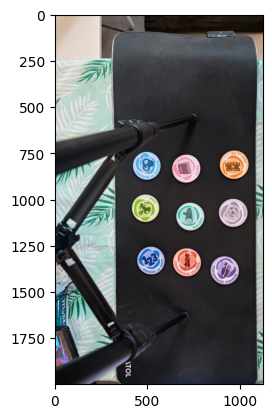

In [2]:
m1_o = cv.imread("./images/mysteres1.jpg")
m1_resized = cv.resize(m1_o, (m1_o.shape[1] // 2, m1_o.shape[0] // 2))
m1_rgb = cv.cvtColor(m1_resized, cv.COLOR_BGR2RGB)
plt.imshow(m1_rgb)
m1_hsv = cv.cvtColor(m1_resized, cv.COLOR_BGR2HSV)
h,s,v = cv.split(m1_hsv)

In [3]:
circles = gc(m1_rgb)
print(circles)

[[[ 516.5 1332.5   74.6]
  [ 706.5  835.5   75.8]
  [ 964.5  814.5   77.4]
  [ 493.5  819.5   75.2]
  [ 959.5 1073.5   77.4]
  [ 709.5 1341.5   75.2]
  [ 914.5 1385.5   76.3]
  [ 728.5 1095.5   75.8]
  [ 486.5 1048.5   74.5]]]
[[ 516 1332   75]
 [ 706  836   76]
 [ 964  814   77]
 [ 494  820   75]
 [ 960 1074   77]
 [ 710 1342   75]
 [ 914 1386   76]
 [ 728 1096   76]
 [ 486 1048   74]]


In [4]:
average_dict = gac(m1_rgb, circles)
print(average_dict)

{114.75567506368526: array([ 516, 1332,   75], dtype=uint16), 169.0097199977909: array([706, 836,  76], dtype=uint16), 12.843817320120637: array([964, 814,  77], dtype=uint16), 106.40062270025474: array([494, 820,  75], dtype=uint16), 157.2900965011591: array([ 960, 1074,   77], dtype=uint16), 20.343739079790332: array([ 710, 1342,   75], dtype=uint16), 138.7495724137931: array([ 914, 1386,   76], dtype=uint16), 88.73283202477054: array([ 728, 1096,   76], dtype=uint16), 34.54695231996274: array([ 486, 1048,   74], dtype=uint16)}


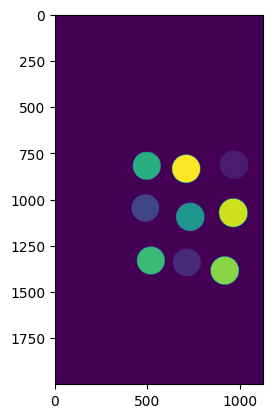

In [5]:
colored_circle = np.full((m1_resized.shape[0], m1_resized.shape[1]),0,dtype=np.uint8)
for color, circle in average_dict.items():
    cv.circle(colored_circle, (circle[0], circle[1]), circle[2], (color, color, color), -1)
plt.imshow(colored_circle)